In [1]:
import graph_tool.all as gt
import numpy as npr
import numpy.random as npr
from numpy.linalg import norm
from pylab import *

In [2]:
                                       #importing data

mass, lum, mag= loadtxt('new_data.txt', usecols=(2,3,4), unpack=True, skiprows=2)



                                     #building the graph

g = gt.Graph(directed=False)
Mass = g.new_vertex_property('float')
Lum  = g.new_vertex_property('float')
Mag = g.new_vertex_property('float')
pos = g.new_vertex_property('vector<float>')
pos_ = g.new_vertex_property('vector<float>')


In [3]:
g.vp.mass=Mass
g.vp.lum = Lum
g.vp.mag = Mag
g.vp.pos = pos
g.vp.pos_ = pos_

In [4]:
                                      #global parameters

N=800


mag =mag[0:N]
lum =lum[0:N]
mass =mass[0:N]

init_foot = 0.003
ibin =      0.003
fbin =      0.21

max_iter=8
init_step=0.5
K=1.5


#a=1
#b=0 
#foot = (init_foot)*(10**a)
#BIN = ibin - foot*b

draw = True

In [5]:
min(mag), max(mag)


(3.589477, 4.862083)

In [6]:
min(lum), max(lum)

(5.343182, 6.001361)

In [7]:

min(mass), max(mass)

(12.495226, 59.949995)

In [8]:
#minmax scaling
mag -= min(mag); mag /= max(mag)

lum -= min(lum); lum /= max(lum)

mass -= min(mass); mass /= max(mass)

In [9]:
min(mag), max(mag)

(0.0, 1.0)

In [10]:
min(lum), max(lum)

(0.0, 1.0)

In [11]:
min(mass), max(mass)

(0.0, 1.0)

In [12]:
                                       #applying properties


v = g.add_vertex(N)

for i, v in enumerate(g.vertices()):
    g.vp.mass[v]=mass[i]
    g.vp.lum[v]=lum[i]
    g.vp.mag[v]=mag[i]
    g.vp.pos[v] = np.array([mag[i],lum[i]]).T


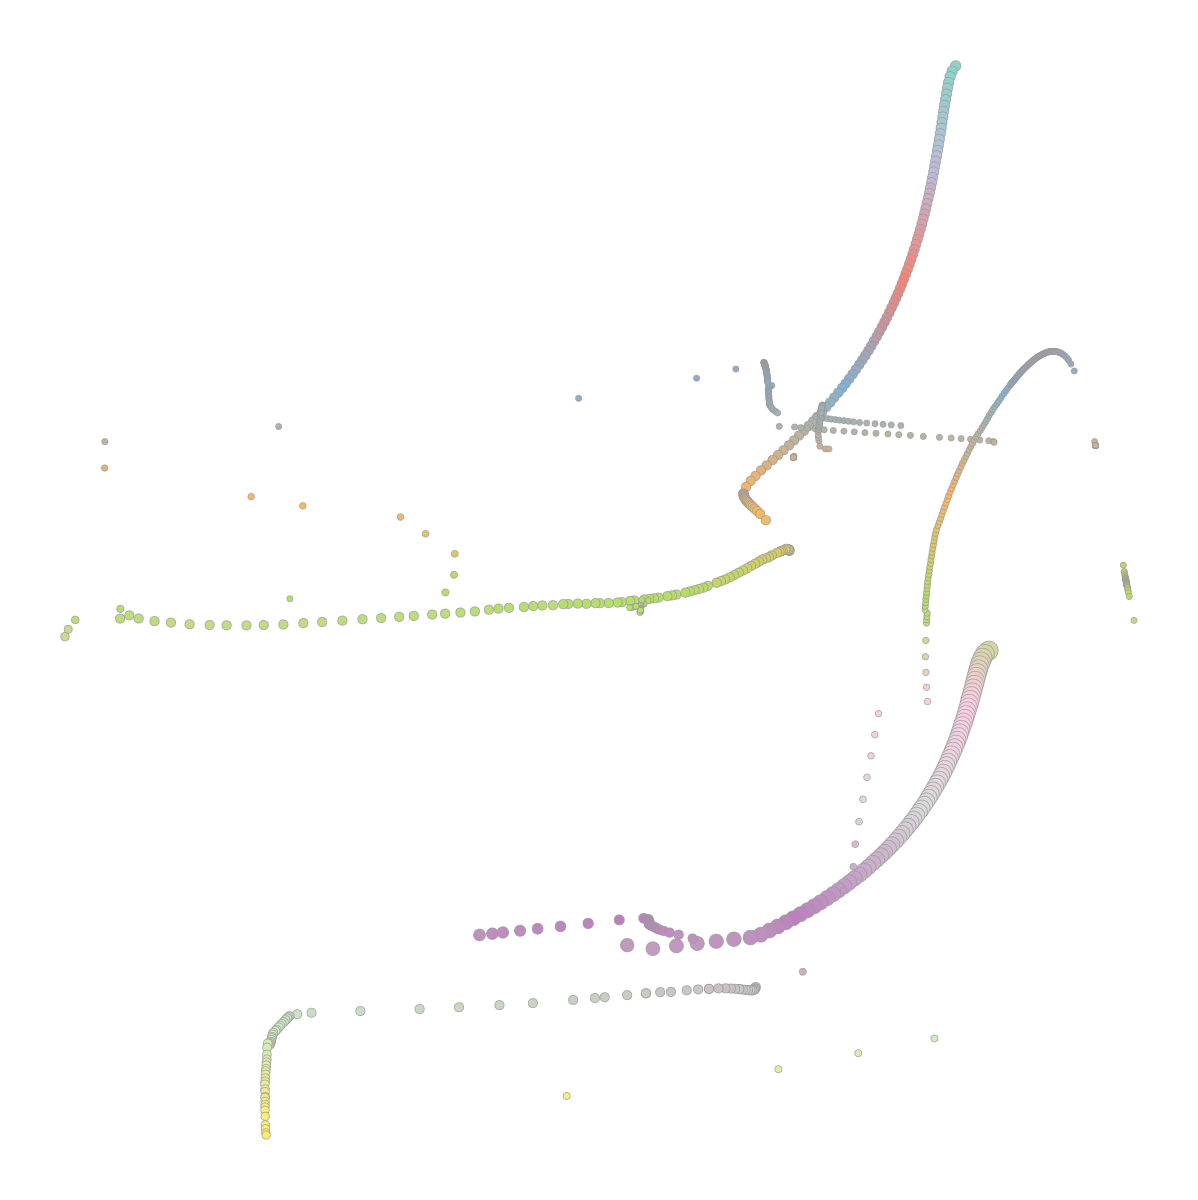

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f80fb4cddf0, at 0x7f80de6e5f40>

In [13]:
gt.graph_draw(g, pos=g.vp.pos, vertex_fill_color=g.vp.lum,vertex_size=gt.prop_to_size(g.vp.mass, mi=3, ma=9.5, log=False, power=2))

In [14]:
posv=g.vp.pos.get_2d_array([0, 1]).T

In [15]:
gg, gpos = gt.geometric_graph(posv, ibin)

In [16]:
gu = gt.graph_union(gg, g, intersection=g.vertex_index, internal_props=True)

In [17]:
gu.copy_property(gpos, tgt=gu.vp.pos_, g=gg)

In [18]:
gu.vp.pos_ = gt.sfdp_layout(gu, pos=gu.vp.pos_, K=K)

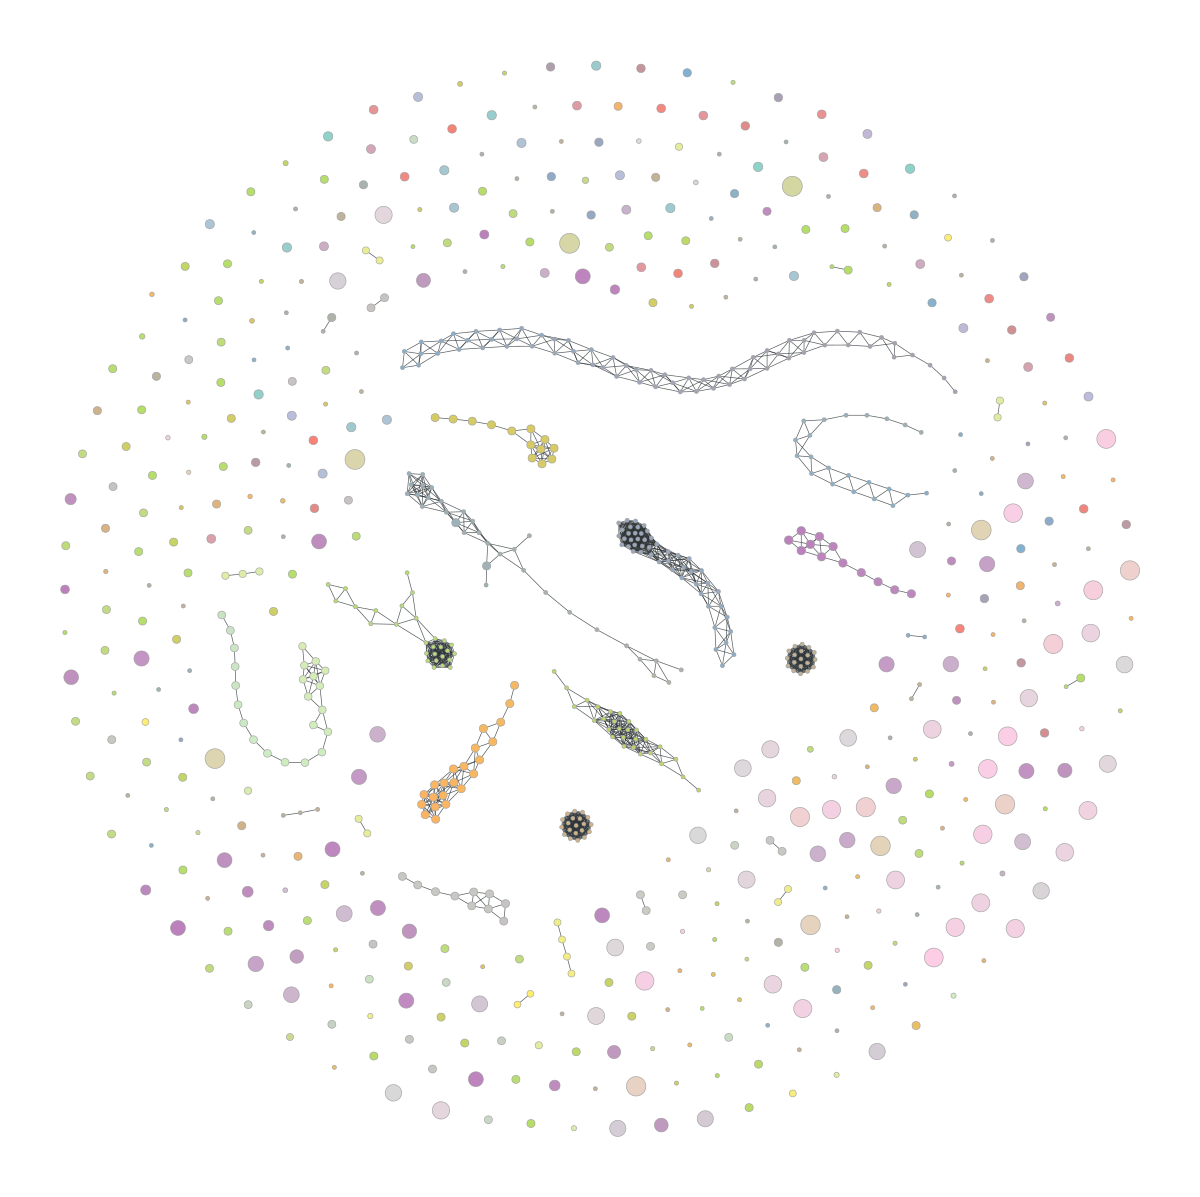

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f80de6f56a0, at 0x7f8119cb0160>

In [19]:
gt.graph_draw(gu, pos=gu.vp.pos_, vertex_fill_color=gu.vp.lum,vertex_size=gt.prop_to_size(gu.vp.mass, mi=2, ma=10, log=False, power=2))

In [20]:
def make_gif(g, ibin, init_foot, fbin, init_step, max_iter, K):
    cbin = ibin
    g.vp.pos_ = gt.sfdp_layout(g, pos=g.vp.pos_, K=K)
    graphs = [g]
    points = g.vp.pos.get_2d_array([0,1]).T
    while cbin <= fbin:
        gg, gpos = gt.geometric_graph(points, cbin)

        gu=graphs[-1].copy()
        ggedgelist=gg.get_edges()
        guedgelist=gu.get_edges()
        for edge in ggedgelist:
            if not(edge in guedgelist):
                gu.add_edge(edge[0], edge[1]) 
        gu.vp.pos_ = gt.sfdp_layout(gu, pos=gu.vp.pos_, max_iter=max_iter, init_step=init_step, K=K)
        graphs.append(gu)
        
        cbin+=init_foot
    return graphs


In [21]:
graphlist = make_gif(gu, ibin, init_foot, fbin, init_step, max_iter, K);

In [23]:
for i, gu in enumerate(graphlist):
    gt.graph_draw(gu, pos=gu.vp.pos_, vertex_fill_color=gu.vp.lum,edge_color= "white", edge_pen_width=0.5, vertex_size=gt.prop_to_size(gu.vp.mass, mi=2, ma=10, log=False, power=2), output="draw %i.png" %i)

In [22]:
graphlist[-1].num_edges()

1994